In [39]:
import cv2 
import numpy as np
import dlib
import matplotlib.pyplot as plt 
import sys

def imshow(title ="image",image = None, size= 10 ):
    w, h =image.shape[0],image.shape[1]
    aspect_ratio =  w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.show()

Genişlik: 359 piksel, Yükseklik: 528 piksel, Kanallar: 3


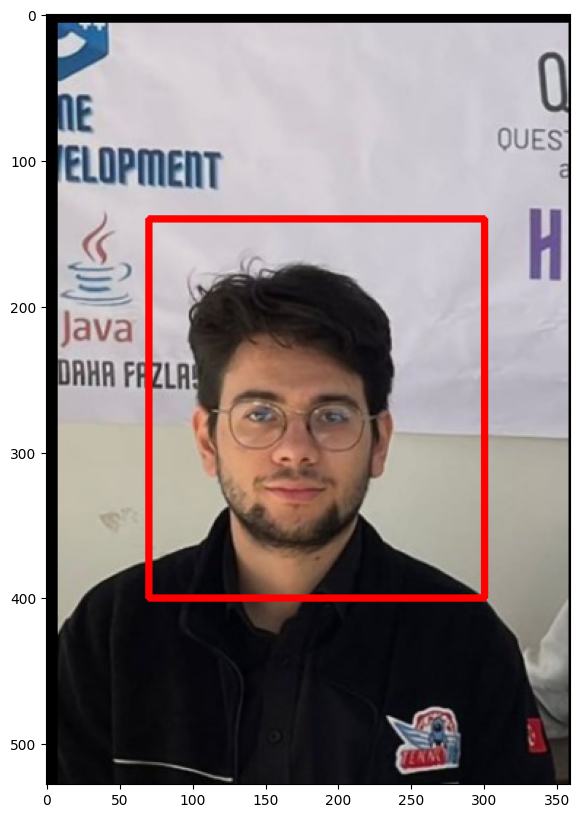

In [40]:
# Load our image
image = cv2.imread(r'C:\Users\cengh\Desktop\ComputerVison\HaarCascade\CengizhanBayram.jpeg')
copy = image.copy()
# Create a mask (of zeros uint8 datatype) that is the same size (width, height) as our original image 
mask = np.zeros(image.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)
height, width, channels = image.shape
print(f"Genişlik: {width} piksel, Yükseklik: {height} piksel, Kanallar: {channels}")
# Needs to be set Manually or selected with cv2.selectROI()
x1, y1, x2, y2 = 70, 140, 300, 400
start = (x1, y1)
end = (x2, y2)

# Format is X,Y,W,H
rect = (x1,y1,x2-x1,y2-y1)

# Show Rectangle
cv2.rectangle(copy, start, end, (0,0,255), 3)
imshow("Input Image", copy)

#### **Grabcut Arguments**

- **img** - Input image
- **mask** - It is a mask image where we specify which areas are background, foreground or probable background/foreground etc. It is done by the following flags, cv.GC_BGD, cv.GC_FGD, cv.GC_PR_BGD, cv.GC_PR_FGD, or simply pass 0,1,2,3 to image.
- **rec**t - It is the coordinates of a rectangle which includes the foreground object in the format (x,y,w,h)
- **bdgModel, fgdModel** - These are arrays used by the algorithm internally. You just create two np.float64 type zero arrays of size (1,65).
- **iterCount** - Number of iterations the algorithm should run.
- **mode** - It should be cv.GC_INIT_WITH_RECT or cv.GC_INIT_WITH_MASK or combined which decides whether we are drawing rectangle or final touchup strokes.

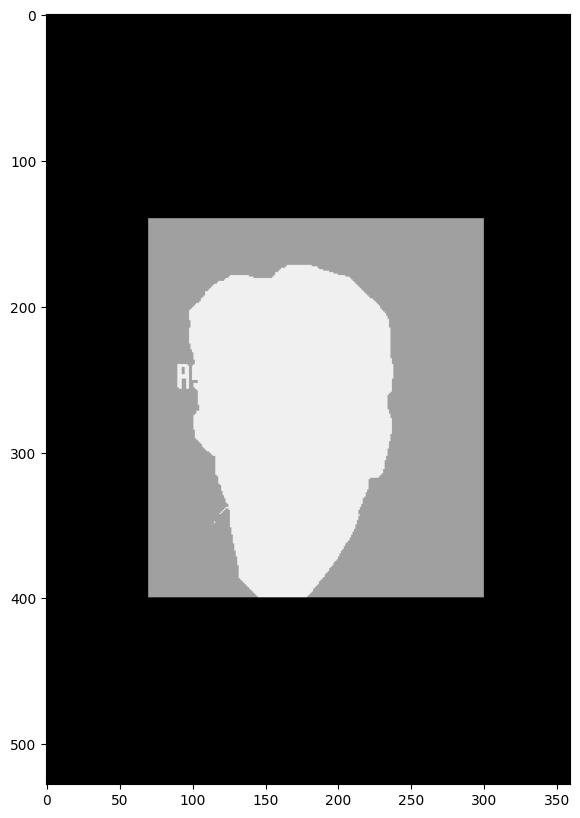

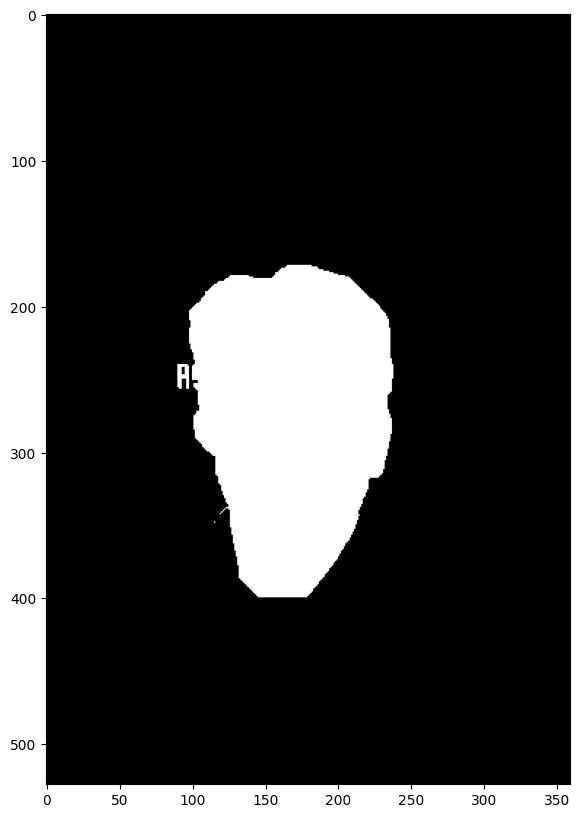

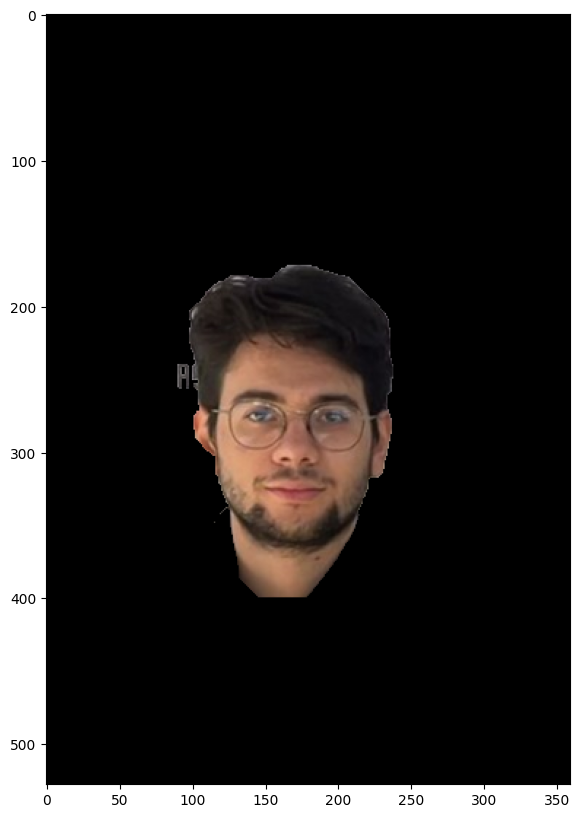

In [41]:
# Let the algorithm run for 5 iterations. Mode should be cv.GC_INIT_WITH_RECT since we are using rectangle. 
# Grabcut modifies the mask image. 
# In the new mask image, pixels will be marked with four flags denoting background/foreground as specified above. 
# So we modify the mask such that all 0-pixels and 2-pixels are put to 0 (i.e. background) & all 1-pixels and 3-pixels are put to 1(i.e. foreground pixels). 
# Now our final mask is ready. Just multiply it with input image to get the segmented image.
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image = image * mask2[:,:,np.newaxis]

imshow("Mask", mask * 80)
imshow("Mask2", mask2 * 255)
imshow("Image", image)